In [5]:
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

# Supply Chain Analysis

The data presented here includes information on Production volumes and cost. Transportation modes and rates, Supplier information and product types.  

In [171]:
data = Table.read_table('supply_chain_data.csv')
data.drop('Customer demographics').show(5)

Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping carriers,Shipping costs,Supplier name,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
haircare,SKU0,69.808,55,802,8662,58,7,96,4,Carrier B,2.95657,Supplier 3,Mumbai,29,215,29,46.2799,Pending,0.22641,Road,Route B,187.752
skincare,SKU1,14.8435,95,736,7460.9,53,30,37,2,Carrier A,9.71657,Supplier 3,Mumbai,23,517,30,33.6168,Pending,4.85407,Road,Route B,503.066
haircare,SKU2,11.3197,34,8,9577.75,1,10,88,2,Carrier B,8.05448,Supplier 1,Mumbai,12,971,27,30.688,Pending,4.58059,Air,Route C,141.92
skincare,SKU3,61.1633,68,83,7766.84,23,13,59,6,Carrier C,1.72957,Supplier 5,Kolkata,24,937,18,35.6247,Fail,4.74665,Rail,Route A,254.776
skincare,SKU4,4.8055,26,871,2686.51,5,3,56,8,Carrier A,3.89055,Supplier 1,Delhi,5,414,3,92.0652,Fail,3.14558,Air,Route A,923.441


Lets begin by seeing if there is an obvious pattern between Lead Time and Production Volumes for all five of our Suppliers. 

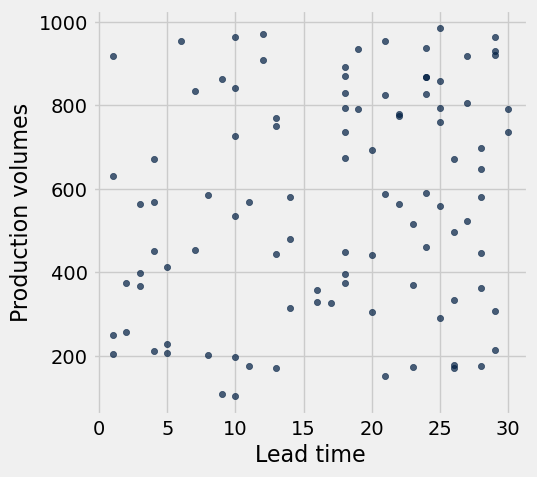

In [7]:
data.scatter('Lead time', 'Production volumes')

The data are evenly distributed and there are no apparent patterns between production volumes and Lead Time.

# Suppliers

Lets separate our dataset into information pertaining to only Suppliers.

In [8]:
suppliers = data.select('Supplier name', 'Location', 'Shipping costs', 'Lead time', 'Manufacturing lead time', 'Manufacturing costs', 'Inspection results','Defect rates')
suppliers

Supplier name,Location,Shipping costs,Lead time,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates
Supplier 3,Mumbai,2.95657,29,29,46.2799,Pending,0.22641
Supplier 3,Mumbai,9.71657,23,30,33.6168,Pending,4.85407
Supplier 1,Mumbai,8.05448,12,27,30.688,Pending,4.58059
Supplier 5,Kolkata,1.72957,24,18,35.6247,Fail,4.74665
Supplier 1,Delhi,3.89055,5,3,92.0652,Fail,3.14558
Supplier 4,Bangalore,4.4441,10,17,56.7665,Fail,2.77919
Supplier 3,Kolkata,3.88076,14,24,1.08507,Pending,1.00091
Supplier 4,Bangalore,2.34834,22,1,99.4661,Fail,0.398177
Supplier 4,Mumbai,3.40473,13,8,11.423,Pending,2.70986
Supplier 2,Chennai,7.16665,29,23,47.9576,Pending,3.84461


Lets see which suppliers have the highest Defect rates.

In [9]:
grouped_suppliers = suppliers.group('Supplier name',sum).drop('Inspection results sum', 'Location sum')
grouped_suppliers.sort('Defect rates sum', descending=True)

Supplier name,Shipping costs sum,Lead time sum,Manufacturing lead time sum,Manufacturing costs sum,Defect rates sum
Supplier 2,126.262,408,343,915.695,51.9805
Supplier 1,148.832,399,340,1221.86,48.698
Supplier 5,104.217,325,294,805.828,47.9774
Supplier 4,103.672,274,276,1128.78,42.0732
Supplier 3,71.8316,302,224,654.512,36.9868


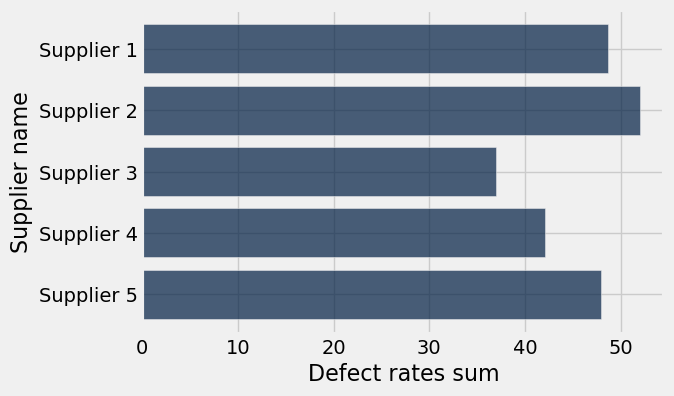

In [10]:
grouped_suppliers.barh('Supplier name', 'Defect rates sum')

Lets see if there are any associations between Manufacturing Lead Time and Manufacturing Cost.

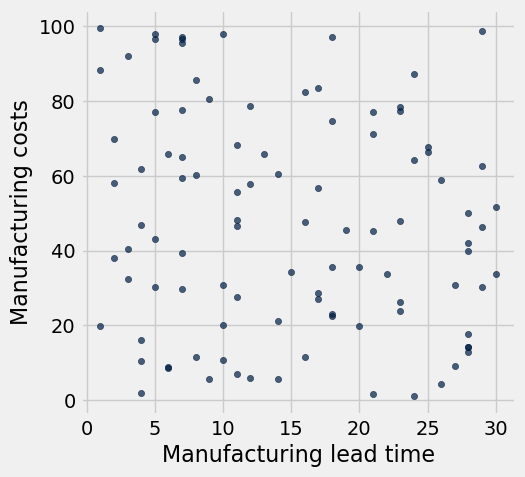

In [11]:
suppliers.scatter('Manufacturing lead time', 'Manufacturing costs')

The data are evenly distributed and there are no apparent patterns between manufacturing cost and manufacturing lead time.

In [15]:
suppliers

Supplier name,Location,Shipping costs,Lead time,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates
Supplier 3,Mumbai,2.95657,29,29,46.2799,Pending,0.22641
Supplier 3,Mumbai,9.71657,23,30,33.6168,Pending,4.85407
Supplier 1,Mumbai,8.05448,12,27,30.688,Pending,4.58059
Supplier 5,Kolkata,1.72957,24,18,35.6247,Fail,4.74665
Supplier 1,Delhi,3.89055,5,3,92.0652,Fail,3.14558
Supplier 4,Bangalore,4.4441,10,17,56.7665,Fail,2.77919
Supplier 3,Kolkata,3.88076,14,24,1.08507,Pending,1.00091
Supplier 4,Bangalore,2.34834,22,1,99.4661,Fail,0.398177
Supplier 4,Mumbai,3.40473,13,8,11.423,Pending,2.70986
Supplier 2,Chennai,7.16665,29,23,47.9576,Pending,3.84461


Lets look at our inspection results for all suppliers combined.

In [178]:
inspection_fails = inspections.column(1).item(0)/suppliers.num_rows * 100
inspection_pass = inspections.column(1).item(1)/suppliers.num_rows* 100
inspection_pending = inspections.column(1).item(2)/suppliers.num_rows* 100

In [179]:
print("Inspection Fails:\t", inspection_fails, "%")
print("Inspection Pass:\t", inspection_pass, "%")
print("Inspection Pending:\t", inspection_pending, "%")

inspections

Inspection Fails:	 36.0 %
Inspection Pass:	 23.0 %
Inspection Pending:	 41.0 %


Inspection results,count
Fail,36
Pass,23
Pending,41


Lets define a function to show us our suppliers with the highest percentages of Inspection Fails.

In [180]:
def classify_inspection_results(inspection_results):
    '''classifies Inspection Results into fail = 1, pass = 0, pending = none'''
    if inspection_results == 'Fail':
        return 1
    elif inspection_results == 'Pass':
        return 0

In [181]:
classified = suppliers.apply(classify_inspection_results, 'Inspection results')
suppliers_with_inspection_classification = suppliers.with_column('Classified', classified)
suppliers_with_inspection_classification

Supplier name,Location,Shipping costs,Lead time,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Classified
Supplier 3,Mumbai,2.95657,29,29,46.2799,Pending,0.22641,None
Supplier 3,Mumbai,9.71657,23,30,33.6168,Pending,4.85407,None
Supplier 1,Mumbai,8.05448,12,27,30.688,Pending,4.58059,None
Supplier 5,Kolkata,1.72957,24,18,35.6247,Fail,4.74665,1
Supplier 1,Delhi,3.89055,5,3,92.0652,Fail,3.14558,1
Supplier 4,Bangalore,4.4441,10,17,56.7665,Fail,2.77919,1
Supplier 3,Kolkata,3.88076,14,24,1.08507,Pending,1.00091,None
Supplier 4,Bangalore,2.34834,22,1,99.4661,Fail,0.398177,1
Supplier 4,Mumbai,3.40473,13,8,11.423,Pending,2.70986,None
Supplier 2,Chennai,7.16665,29,23,47.9576,Pending,3.84461,None


In [182]:
classified_inspection = suppliers_with_inspection_classification.drop(1,2,3,4,5,6,7)
classified_inspection_fails = classified_inspection.where('Classified', are.equal_to(1))

As you can see below the Supplier with the highest percentage of Inspection fails is Supplier 4 with a 12% Fail ratio.

In [183]:
supplier_one = grouped_fails.column(1).item(0)/suppliers.num_rows * 100
supplier_two = grouped_fails.column(1).item(1)/suppliers.num_rows * 100
supplier_three = grouped_fails.column(1).item(2)/suppliers.num_rows * 100
supplier_four = grouped_fails.column(1).item(3)/suppliers.num_rows * 100
supplier_five = np.round(grouped_fails.column(1).item(4)/suppliers.num_rows * 100)

In [184]:
print("Supplier Fail Percentages, ranked")
print("")
print("Supplier 4 :\t", supplier_four, "%")
print("Supplier 2 :\t", supplier_two, "%")
print("Supplier 5 :\t", supplier_five, "%")
print("Supplier 1 :\t", supplier_one, "%")
print("Supplier 3 :\t", supplier_three, "%")

grouped_fails = classified_inspection_fails.group('Supplier name')
grouped_fails.sort(1, descending=True)

Supplier Fail Percentages, ranked

Supplier 4 :	 12.0 %
Supplier 2 :	 8.0 %
Supplier 5 :	 7.0 %
Supplier 1 :	 6.0 %
Supplier 3 :	 3.0 %


Supplier name,count
Supplier 4,12
Supplier 2,8
Supplier 5,7
Supplier 1,6
Supplier 3,3


# Summarized Supplier Report :

In [185]:
summed = suppliers.drop(1,6).group('Supplier name', sum)
summedd = summed.with_columns('Inspection Fail ratio (Percent)', grouped_fails.column(1))
summedd

Supplier name,Shipping costs sum,Lead time sum,Manufacturing lead time sum,Manufacturing costs sum,Defect rates sum,Inspection Fail ratio (Percent)
Supplier 1,148.832,399,340,1221.86,48.698,6
Supplier 2,126.262,408,343,915.695,51.9805,8
Supplier 3,71.8316,302,224,654.512,36.9868,3
Supplier 4,103.672,274,276,1128.78,42.0732,12
Supplier 5,104.217,325,294,805.828,47.9774,7


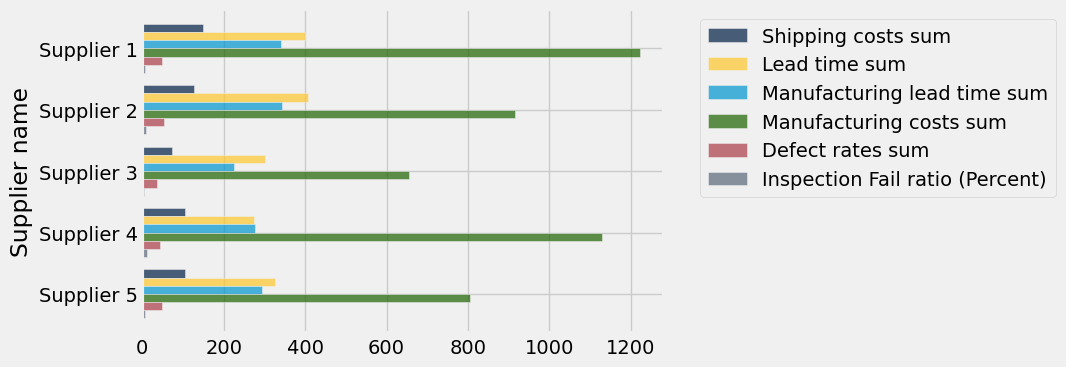

In [189]:
summedd.barh('Supplier name')

In [187]:
print('Supplier 2 has the second highest shipping cost')
print('Supplier 2 has the longest lead time')
print('Supplier 2 has the longest Manufacturing lead time')
print('Supplier 2 has the third highest Manufacturing Cost')
print('Supplier 2 has the highest defect rate')
print('Supplier 2 has the second highest inspection fail rate')

Supplier 2 has the second highest shipping cost
Supplier 2 has the longest lead time
Supplier 2 has the longest Manufacturing lead time
Supplier 2 has the third highest Manufacturing Cost
Supplier 2 has the highest defect rate
Supplier 2 has the second highest inspection fail rate


# In Conclusion :

In [190]:
print("There is no correlation between Lead Time and Production Volumes")
print("There is no correlation between Manufacturing Lead Time and Manufacturing Cost.")
print("")
print("Total Inspection Pass, Fail and Pending ratior for every Supplier")
print("")

print("Inspection Fails:\t", inspection_fails, "%")
print("Inspection Pass:\t", inspection_pass, "%")
print("Inspection Pending:\t", inspection_pending, "%")
print("")

print("Individual Supplier Fail Percentages, ranked")
print("")
print("Supplier 4 :\t", supplier_four, "%")
print("Supplier 2 :\t", supplier_two, "%")
print("Supplier 5 :\t", supplier_five, "%")
print("Supplier 1 :\t", supplier_one, "%")
print("Supplier 3 :\t", supplier_three, "%")

There is no correlation between Lead Time and Production Volumes
There is no correlation between Manufacturing Lead Time and Manufacturing Cost.

Total Inspection Pass, Fail and Pending ratior for every Supplier

Inspection Fails:	 36.0 %
Inspection Pass:	 23.0 %
Inspection Pending:	 41.0 %

Individual Supplier Fail Percentages, ranked

Supplier 4 :	 12.0 %
Supplier 2 :	 8.0 %
Supplier 5 :	 7.0 %
Supplier 1 :	 6.0 %
Supplier 3 :	 3.0 %
